### Load the Data - EDA & Data Preparation

In [173]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': (15,8)}) # Size all seaborn plots from the get go

In [174]:
df = pd.read_csv('data.csv')

In [175]:
len(df)

11914

In [176]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [177]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [178]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [179]:
# We just want the columns that are strings
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
# Now lowercase and replace all the spaces with underscores
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [180]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


We will use the MSRP as our target variable.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

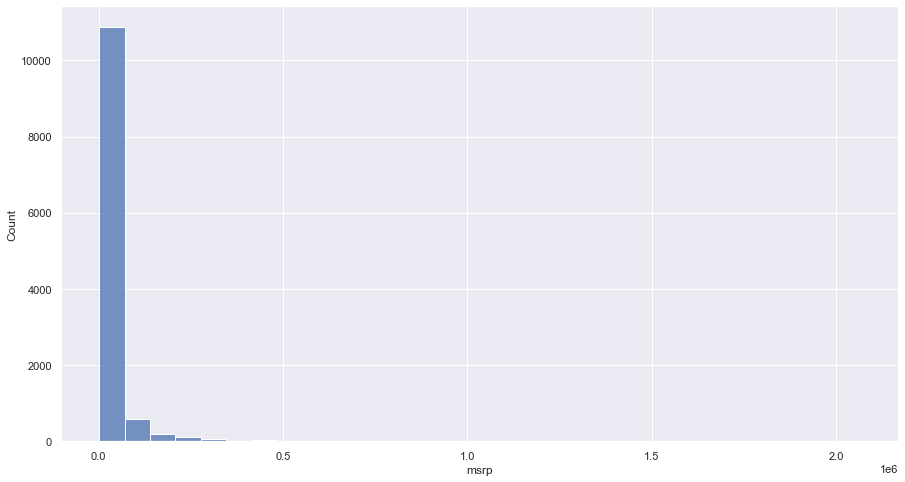

In [181]:
sns.histplot(df.msrp, bins = 30)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

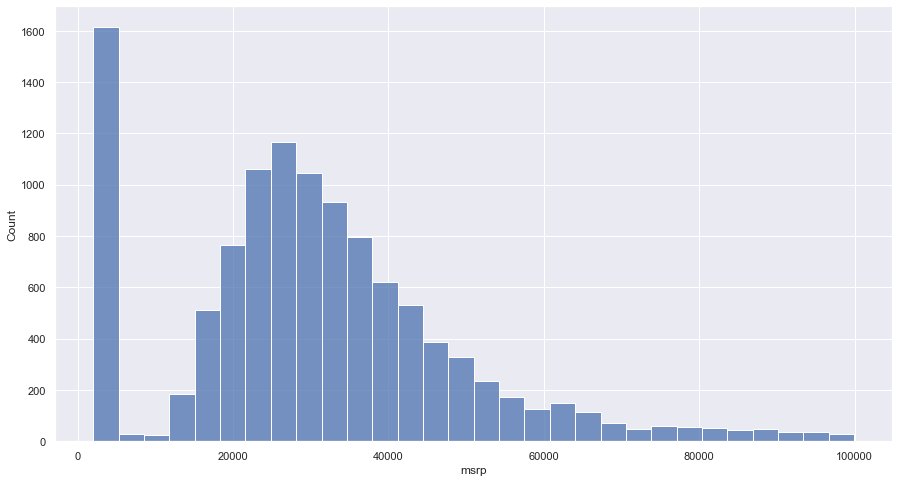

In [182]:
sns.histplot(df.msrp[df.msrp<100000], bins = 30)

We can use a log transformation to deal with the outliers. y_ = log(y+1)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

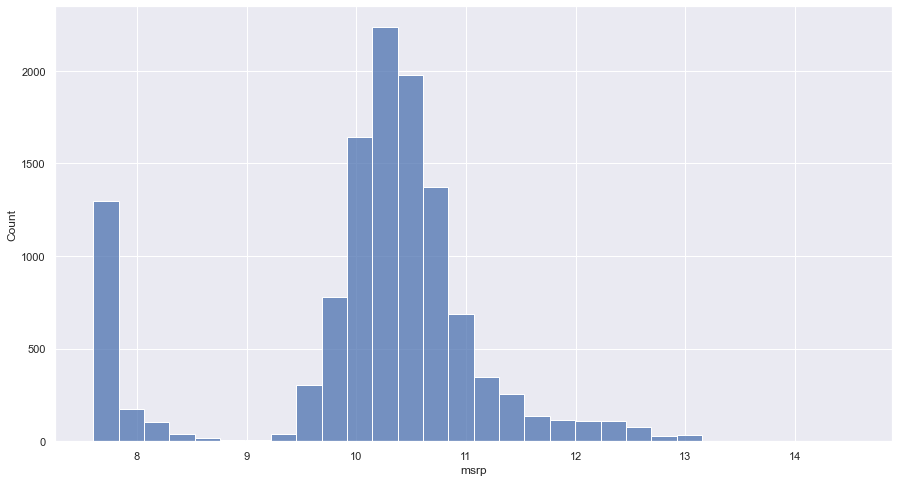

In [183]:
log_msrp = np.log1p(df.msrp)
sns.histplot(log_msrp, bins=30)

In [184]:
# Check for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Split the dataset into:
1. Training: 60%
2. Validation: 20%
3. Testing: 20%

In [185]:
# Instead of using scikit-learn, we'll split by 'first principles'
n_samples = len(df)

n_validation = int(0.2*n_samples)
n_test = int(0.2*n_samples)
n_train = n_samples - (n_validation + n_test)

np.random.seed(42) # 42 will be the starting seed for all the generated data ensuring reproducible data
index = np.arange(n_samples)
np.random.shuffle(index)

# Let's get a shuffled dataframe

df_shuffled = df.iloc[index] # iloc gives us access to the rows of the df

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_validation].copy()
df_test = df_shuffled.iloc[n_train+n_validation:].copy()

In [186]:
# Now log transform the output variable - this could've been done before the split

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [187]:
# We need to extract data from our dataframe to create a matrix for the linear regression model below

In [188]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)

['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']


In [189]:
base_features = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base_features]

In [190]:
# Let's be crude and fill our missing data with zeros
df_num = df_num.fillna(0)

In [191]:
X_train = df_num.values

### Linear Regression

Instead of using the scikit-learn framework, use a from scratch approach.
y = g(X) where X is a matrix where the features of observations are rows of the matrix and y is the value we're trying to predict

In [192]:
def train_linear_regression(X,y):
    """
    Linear regression: g(x) = w(bias) + X(transposed)w
    w = (X(transposed)inverse(X(transposed)y) --> The normal equation for weights in LR
    :param X: Our input vector
    :param y: Our target vector
    :return: the bias weight and the vector weights
    """

    #   We have to add a columns of one's as the first column in our input vector
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # An equation for calculating the weights
    xtx = X.T.dot(X)
    xtx_inv = np.linalg.inv(xtx)
    w = xtx_inv.dot(X.T).dot(y)

    return w[0], w[1:]


In [193]:
# Train the model
w_0, w = train_linear_regression(X_train, y_train)
# And apply it to the training data to see how it fits...
y_pred = w_0 + X_train.dot(w)

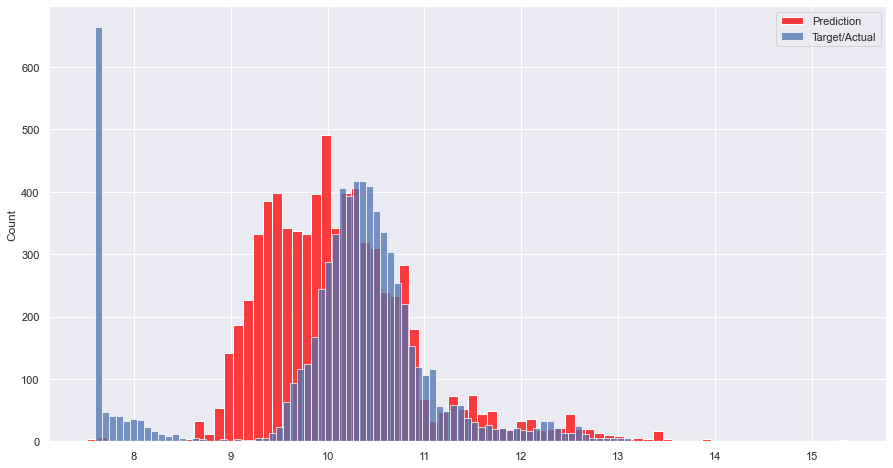

In [194]:
# If we look at the above graphically...

sns.histplot(y_pred, label= 'Prediction', color='red')
sns.histplot(y_train, label = 'Target/Actual')
plt.legend()

We can evaluate our model using Root Mean Squared Error (RMSE) to determine how large the error in our model is.
Again, we can define this through first principles rather than utilising a package (well, we're using Numpy but...)

In [195]:
def rmse(y_true, y_pred):
    """
    A function to calculate the root mean squared error
    :param y_true: A numpy array representing the true dependent variable
    :param y_pred: A numpy array representing the model results of the dependent variable
    :return: The root mean squared error - the closer to zero, the better the model, i.e.
    when comparing 2 models, the lower the rmse the better the model
    """
    error = y_pred - y_true
    mse = (error**2).mean()
    return np.sqrt(mse)


In [196]:
# For our model, based on the training set (but should really be used on the validation set)

rmse_ = rmse(y_train, y_pred)
print(rmse_)

0.7570200472453602


In [197]:
# For the validation set

df_num = df_val[base_features]
df_num = df_num.fillna(0)
X_val = df_num.values

y_pred = w_0 + X_val.dot(w)
print(rmse(y_val, y_pred))

0.7398184285113435


### Feature Engineering

The above exemplifies the use of linear regression with some simple input features from the dataset "['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']". If we do some further feature engineering we can improve our model.

In [198]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [199]:
# When was the data generated (base it on the highest year value?)
# Instead of using year we can use age:
df.year.max()

2017

In [200]:
def prepare_X(df):
    """
    A function to automate preparing the input vector
    :param df: The dataframe from which to create an input vector
    :return: An input vector of attributes to feed into our model
    """
    df = df.copy() # Modify a copy of the original dataframe passed to avoid
    # potential issues using the dataframe further down the line.
    features = base_features.copy()

    df['age'] = df.year.max() - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [201]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print(rmse(y_val, y_pred))

0.513324102582641


The addition of age has improved our model as the RMSE has dropped. Visualise...

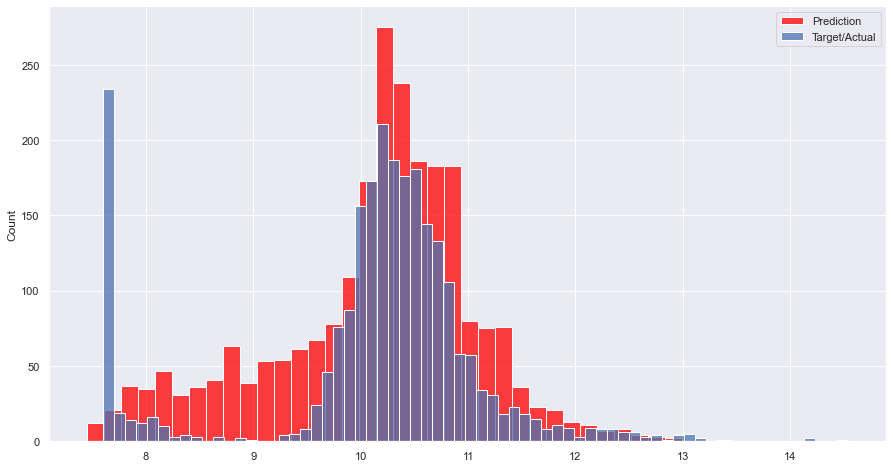

In [202]:
sns.histplot(y_pred, label= 'Prediction', color='red')
sns.histplot(y_val, label = 'Target/Actual')
plt.legend()

One-hot encoding of the categorical number of doors variable

In [203]:
def prepare_X(df):
    """
    A function to automate preparing the input vector
    :param df: The dataframe from which to create an input vector
    :return: An input vector of attributes to feed into our model
    """
    df = df.copy() # Modify a copy of the original dataframe passed to avoid
    # potential issues using the dataframe further down the line.
    features = base_features.copy()

    df['age'] = df.year.max() - df.year
    features.append('age')

    for num in [2,3,4]:
        feature = 'num_doors_{}'.format(num)
        value = (df['number_of_doors'] == num).astype(int)
        df[feature] = value
        features.append(feature)

    for name in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_{}'.format(name)
        value = (df['make'] == name).astype(int)
        df[feature] = value
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [204]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print(rmse(y_val, y_pred))

0.5015149550256524


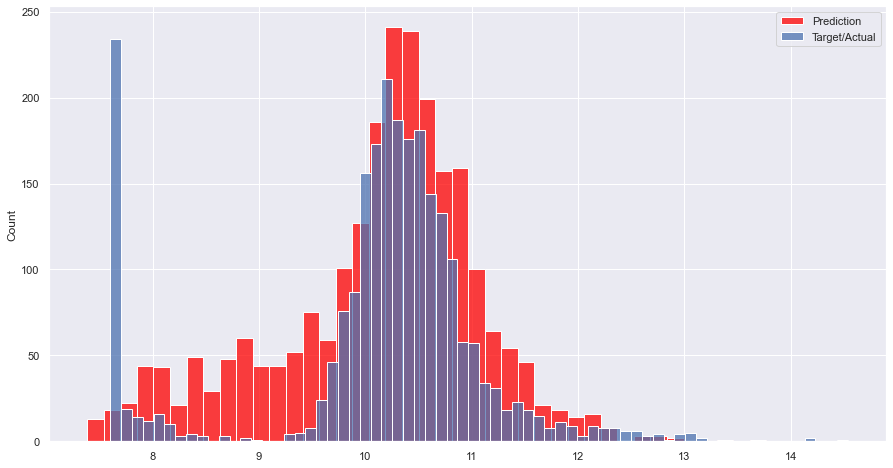

In [205]:
sns.histplot(y_pred, label= 'Prediction', color='red')
sns.histplot(y_val, label = 'Target/Actual')
plt.legend()

...to be continued 